In [2]:
import os

import bk.load
import bk.compute
import bk.plot
import bk.signal

import numpy as np
import pandas as pd

import scipy.signal
import scipy.stats
import scipy.io

import matplotlib.pyplot as plt
import matplotlib as mpl
import neuroseries as nts

from statsmodels.tsa.stattools import grangercausalitytests

In [3]:
import pycorrelate

ModuleNotFoundError: No module named 'pycorrelate'

In [ ]:
bk.load.current_session()
stru = {'hpc':13,'BLA':105}
states = bk.load.states()

Rat : 8 on day : 6
Working with session Rat08-20130713 @ Z:\Rat08\Rat08-20130713


In [14]:
lfp = {}
for s,c in zip(stru.keys(),stru.values()):
    print(s,c)
    lfp.update({s:bk.load.lfp_in_intervals(166,c,states['wake'])})

hpc 13
BLA 105


In [15]:
xcorr = pycorrelate.ucorrelate(lfp['hpc'].values,lfp['BLA'].values,maxlag= 1250)

In [16]:
t = np.linspace(0,1,1250)

In [17]:
len(t)

1250

In [18]:
%matplotlib qt

In [19]:
len(xcorr)

1250

In [20]:
plt.plot(t,xcorr)

In [ ]:
scipy.signal.correlate()

In [14]:
plt.plot(xcorr)

array([3.71808426e+11])

In [50]:
data = pd.DataFrame(columns=['hpc','bla'],data = zip(lfp['hpc'],lfp['BLA']))

In [45]:
%matplotlib
plt.plot(data)

Using matplotlib backend: Qt5Agg


In [51]:
plt.figure()

<Figure size 640x480 with 0 Axes>

In [52]:
plt.hist2d(data['hpc'],data['bla'],250)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-9182.   , -9104.952, -9027.904, -8950.856, -8873.808, -8796.76 ,
        -8719.712, -8642.664, -8565.616, -8488.568, -8411.52 , -8334.472,
        -8257.424, -8180.376, -8103.328, -8026.28 , -7949.232, -7872.184,
        -7795.136, -7718.088, -7641.04 , -7563.992, -7486.944, -7409.896,
        -7332.848, -7255.8  , -7178.752, -7101.704, -7024.656, -6947.608,
        -6870.56 , -6793.512, -6716.464, -6639.416, -6562.368, -6485.32 ,
        -6408.272, -6331.224, -6254.176, -6177.128, -6100.08 , -6023.032,
        -5945.984, -5868.936, -5791.888, -5714.84 , -5637.792, -5560.744,
        -5483.696, -5406.648, -5329.6  , -5252.552, -5175.504, -5098.456,
        -5021.408, -4944.36 , -4867.312, -4790.264, -4713.216, -4636.168,
        -45

In [1]:
t = grangercausalitytests(data,[1,100,250])

NameError: name 'grangercausalitytests' is not defined

In [10]:
t

{1: ({'ssr_ftest': (892.9686113623726, 7.5079325226834655e-196, 243721.0, 1),
   'ssr_chi2test': (892.979603053011, 3.295924645536245e-196, 1),
   'lrtest': (891.3476953422651, 7.459983070510807e-196, 1),
   'params_ftest': (892.9686113624231, 7.507932522376613e-196, 243721.0, 1.0)},
   array([[0., 1., 0.]])]),
 100: ({'ssr_ftest': (15.930555952139336,
    2.9324489648765307e-266,
    243424.0,
    100),
   'ssr_chi2test': (1594.3710126527974, 1.6089820253775208e-267, 100),
   'lrtest': (1589.1765899173915, 1.8414255066104933e-266, 100),
   'params_ftest': (15.9305559521149,
    2.9324489682456776e-266,
    243424.0,
    100.0)},
   array([[0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 0., 0., 0.],
          ...,
          [0., 0., 0., ..., 0., 0., 0.],
          [0., 0., 0., ..., 1., 0., 0.],
          [0., 0., 0., ..., 0., 1., 0.]])]),
 250: ({'ssr_ftest': (4.811454650982971,
    5.609586736104298e-124,
    242974.0,
    250),
   '

In [21]:
data

,BLA,hpc
0,45.793646,-688.494296
1,46.156013,-683.512884
2,-209.762557,-227.974382
3,133.859321,-593.645165
4,423.604664,-85.516785
...,...,...
118545,459.132473,-33.425150
118546,521.179597,-180.166589
118547,329.781805,-120.184726
118548,255.771098,-71.932208


In [30]:
list(np.arange(0,2500,500)+1)

[0, 500, 1000, 1500, 2000]

In [25]:
%matplotlib qt

In [26]:
plt.plot(data)

,BLA,hpc
0,18.0,-667.0
1,95.0,-742.0
2,60.0,-735.0
3,60.0,-736.0
4,133.0,-738.0
...,...,...
2963745,281.0,-89.0
2963746,401.0,-154.0
2963747,478.0,-193.0
2963748,446.0,-244.0


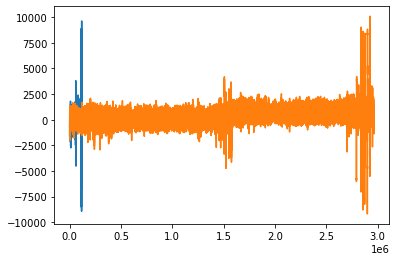

In [10]:
t = np.arange(0,50)
plt.plot(scipy.signal.decimate(lfp['hpc'],25))
plt.plot(lfp['hpc'].values)

array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ])

In [13]:
t = np.linspace(0,100,100000)
x = np.sin(30*t)
y = np.sin(30*t+0.1)

In [14]:
x = x+np.random.rand(len(x))*5
y = y+np.random.rand(len(x))*3

In [15]:
x = nts.Tsd(t,x)
y = nts.Tsd(t,y)

In [16]:
_,phasex = bk.signal.hilbert(x)
_,phasey = bk.signal.hilbert(y)

(array([[0., 0., 0., ..., 1., 0., 2.],
        [1., 2., 1., ..., 1., 0., 2.],
        [1., 0., 1., ..., 1., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 2., 0., ..., 0., 0., 2.],
        [1., 0., 0., ..., 1., 0., 1.]]),
 array([-3.13784347e+00, -3.01231974e+00, -2.88679600e+00, -2.76127226e+00,
        -2.63574853e+00, -2.51022479e+00, -2.38470105e+00, -2.25917732e+00,
        -2.13365358e+00, -2.00812984e+00, -1.88260611e+00, -1.75708237e+00,
        -1.63155863e+00, -1.50603490e+00, -1.38051116e+00, -1.25498742e+00,
        -1.12946368e+00, -1.00393995e+00, -8.78416212e-01, -7.52892475e-01,
        -6.27368738e-01, -5.01845001e-01, -3.76321265e-01, -2.50797528e-01,
        -1.25273791e-01,  2.49945600e-04,  1.25773682e-01,  2.51297419e-01,
         3.76821156e-01,  5.02344893e-01,  6.27868629e-01,  7.53392366e-01,
         8.78916103e-01,  1.00443984e+00,  1.12996358e+00,  1.25548731e+00,
         1.38101105e+00,  1.50653479e+00,  1.63205852e+00,  1.75758

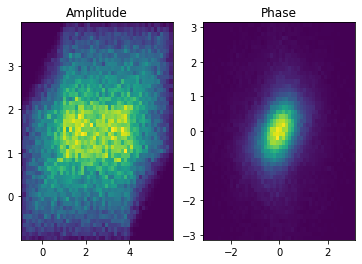

In [17]:
plt.figure()
plt.subplot(1,2,1)
plt.title('Amplitude')
plt.hist2d(x,y,50)
plt.subplot(1,2,2)
plt.title('Phase')
plt.hist2d(phasex,phasey,50)

(0.0, 1.0)

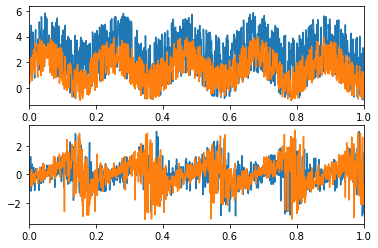

In [20]:
plt.figure()
s = plt.subplot(2,1,1)
plt.plot(t,x)
plt.plot(t,y)
plt.subplot(2,1,2,sharex = s)
plt.plot(t,phasex)
plt.plot(t,phasey)
plt.xlim(0,1)

In [91]:
plt.hist2d(phasex,phasey,200)

(array([[0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-3.14146550e+00, -3.11005052e+00, -3.07863553e+00, -3.04722054e+00,
        -3.01580556e+00, -2.98439057e+00, -2.95297559e+00, -2.92156060e+00,
        -2.89014562e+00, -2.85873063e+00, -2.82731565e+00, -2.79590066e+00,
        -2.76448567e+00, -2.73307069e+00, -2.70165570e+00, -2.67024072e+00,
        -2.63882573e+00, -2.60741075e+00, -2.57599576e+00, -2.54458078e+00,
        -2.51316579e+00, -2.48175081e+00, -2.45033582e+00, -2.41892083e+00,
        -2.38750585e+00, -2.35609086e+00, -2.32467588e+00, -2.29326089e+00,
        -2.26184591e+00, -2.23043092e+00, -2.19901594e+00, -2.16760095e+00,
        -2.13618596e+00, -2.10477098e+00, -2.07335599e+00, -2.04194101e+00,
        -2.01052602e+00, -1.97911104e+00, -1.94769605e+00, -1.91628